## Machine Learning Foundation & Techniques: Assignment 3

### Linear Regression & Feature Transform
---

##### I. Linear Regression Without Feature Transform

Consider the target function:

$$
f(x_1,x_2) = sign(x^2_1 + x^2_2 - 0.6)
$$

Generate a training set of $N = 1000$ points on $\chi = [−1, 1] × [−1, 1]$ with uniform probability of picking each $x \in \chi$. Generate simulated noise by flipping the sign of the output in a random $10\%$ subset of the generated training set.

##### Generate dataset

In [1]:
import numpy as np

def generate_data(N, size, prob):
    """ Generate X by a uniform distribution in [-1, 1].
        Generate Y with a given probaility of noise.
    """
    
    X0 = np.ones(size).reshape((1, N))
    X1 = np.random.uniform(-1, 1, N)
    X2 = np.random.uniform(-1, 1, N)
    X = np.vstack((X0, X1, X2)).T
    
    Y = np.sign(np.square(X1) + np.square(X2) - 0.6).reshape((N, 1))
    flip = np.random.random(size)
    Y[flip <= prob] *= -1            
    
    return X, Y

##### Build model

In [2]:
def linear_regression(X, Y):
    """Construct a linear regression model and return the optimal weight vector W."""
    
    # -- pesudo inverse solution (singular)
    W = np.linalg.pinv(X).dot(Y)
    
    # -- unique solution (need to be invertible)
    # W = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
    
    return W

##### Compute classification error for linear regression

In [3]:
def lin_regression_err(X, Y, W):
    """Calculate classification error (0/1 error)."""
    
    Y_pred = np.sign(X.dot(W))
    zero_one_err = np.sum(Y_pred != Y)
    
    return zero_one_err

#### 13. Carry out Linear Regression without transformation, i.e., with feature vector:


$$(1, x_1, x_2)$$

#### to find $w_{lin}$, and use $w_{lin}$ directly for classification. Run the experiments for $1000$ times and plot a histogram on the **classification** $(0/1)$ in-sample error $(E_{in})$. What is the average $E_{in}$ over $1000$ experiments?


##### Experiment

In [4]:
N = 1000; size = 1000; prob = 0.1; experiment = 1000

total_err_in = []
total_err_out = []
for i in range(experiment):
    X, Y = generate_data(N, size, prob)
    W = linear_regression(X, Y)
    err_in = lin_regression_err(X, Y, W)
    total_err_in.append(err_in)
    
    X_test, Y_test = generate_data(N, size, prob)
    err_out = lin_regression_err(X_test, Y_test, W)
    total_err_out.append(err_out)

avg_err_in = np.mean(total_err_in)
avg_err_out = np.mean(total_err_out)
print('Average classification in-sample error: %.3f' %avg_err_in)
print('Average classification out-of-sample error: %.3f' %avg_err_out)

Average classification in-sample error: 503.996
Average classification out-of-sample error: 519.573


##### Plot error

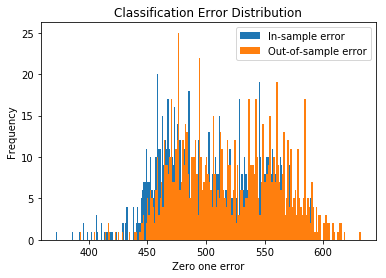

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(total_err_in, bins = 200, label = 'In-sample error')
plt.hist(total_err_out, bins = 200 , label = 'Out-of-sample error')
plt.legend()
plt.title('Classification Error Distribution')
plt.xlabel('Zero one error')
plt.ylabel('Frequency')

##### Note

Note that the target function for $y$ is a circle with a radius $0.6$. It predicts $+1$ for points outside of the circle and predict $-1$ for points fall inside the circle. So our linear regression is trying to fit a straight line for this circle, which will lead to a less satistifed result as above. 

##### II. Linear Regression With Feature Transform

Now, transform the training data into the following nonlinear feature vector:
    
$$(1, x_1, x_2, x_{1}x_{2}, x_{1}^2, x_{2}^2)$$

Find the vector $\tilde{w}$ that corresponds to the solution of Linear Regression, and take it for classification.

##### Transform dataset

In [6]:
def transform_data(X):
    """ Transform the training data into nonlinear feature vector."""
    
    X0 = X.T[0]
    X1 = X.T[1]
    X2 = X.T[2]
    X3 = X1*X2
    X4 = X1**2
    X5 = X2**2
    X = np.vstack((X0, X1, X2, X3, X4, X5)).T          
    
    return X

#### 14. Run the experiment for $1000$ times, and plot a histogram on $\tilde{w_3}$, the weight associated with $x_{1}x_{2}$. What is the average $\tilde{w_3}$?

#### 15. Continue from Question 14, and plot a histogram on the classification $E_{out}$ instead. You can estimate it by generating a new set of $1000$ points and adding noise as before. What is the average $E_{out}$ ?

##### Experiment

In [7]:
experiment = 1000

W3 = np.empty((N, 1))
total_err_in = []
total_err_out = []
for i in range(experiment):
    X, Y= generate_data(N, size, prob)
    X_nonlinear = transform_data(X)
    W = linear_regression(X_nonlinear, Y)
    W3[i] = W[3]
    err_in = lin_regression_err(X_nonlinear, Y, W)
    total_err_in.append(err_in)
    
    X_test, Y_test = generate_data(N, size, prob)
    X_test_nonlinear = transform_data(X_test)
    err_out = lin_regression_err(X_test_nonlinear, Y_test, W)
    total_err_out.append(err_out)

avg_W3 = np.mean(W3)
avg_err_in = np.mean(total_err_in)
avg_err_out = np.mean(total_err_out)
print('Average W3: %f' %avg_W3)
print('Average in-sampel error: %.3f' %avg_err_in)
print('Average out-of-sampel error: %.3f' %avg_err_out)

Average W3: -0.000483
Average in-sampel error: 124.450
Average out-of-sampel error: 126.693


##### Plot $W_3$

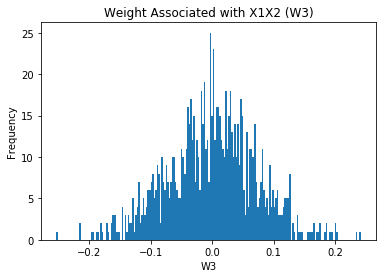

In [8]:
%matplotlib inline

plt.hist(W3, bins = 200)
plt.title('Weight Associated with X1X2 (W3)')
plt.xlabel('W3')
plt.ylabel('Frequency')

##### Plot error

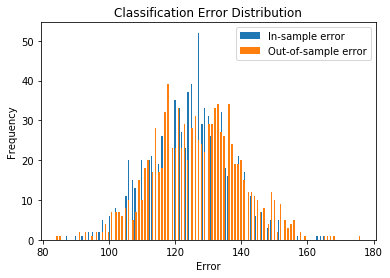

In [9]:
%matplotlib inline

plt.hist(total_err_in, bins = 200, label = 'In-sample error')
plt.hist(total_err_out, bins = 200, label = 'Out-of-sample error')
plt.legend()
plt.title('Classification Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')

##### Note

After transforming the data, our model can now fit better since our feature transform includes quadratic terms. 

### Logistic Regression
---
training set: http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw3/hw3_train.dat 

testing set: http://www.csie.ntu.edu.tw/~htlin/course/ml15fall/hw3/hw3_test.dat

#### 18. Implement the fixed learning rate gradient descent algorithm below for logistic regression, initialized with $0$. Run the algorithm with $\eta = 0.001$ and $T = 2000$. What is the weight vector within your $g$ ? What is the $E_{out}(g)$ from your algorithm, evaluated using the $0/1$ error on the test set?

##### Read & generate dataset

In [10]:
import pandas as pd
import numpy as np

def read_data(file):
    data = pd.read_csv(file, sep = ' ', header = None)
    data = data.drop(0, axis = 1)  # drop the first empty column
    
    return data

In [11]:
def generate_data(data):
    """Return data point X and lable Y."""
    
    X = data.loc[:, 0:20]
    Y = data.loc[:, 21:21].values
    
    N = X.shape[0]
    X0 = np.ones((N, 1))      # add coefficient term X0
    X = np.hstack((X0, X))
    
    return X, Y

##### Build model

In [12]:
def logistic_regression(X, Y, eta, T):
    """ Logistic regression updated by a fixed learning rate gradient descent. 
        Return the weight vector after T iteration. 
    """
    
    d = X.shape[1]
    W = np.zeros((d, 1))  # initialize W with 0
    
    def sigmoid(S):
        return 1 / (1 + np.exp(-S))
    
    def run_gradient(X, Y, W):
        
        S = Y * X.dot(W)
        gradient = np.mean(sigmoid(S) * (-Y * X), axis=0, keepdims=True).T   # column mean
        W_next = W - eta * gradient
        
        return W_next
    
    
    for i in range(T):
        W_next = run_gradient(X, Y, W)
        W = W_next
    
    
    W_last = W
    return W_last


##### Compute classification error for logistic regression 

In [13]:
def log_regression_err(X, Y, W):
    """Compute binary classification (0/1) error for logistic regression."""
    
    def sigmoid(S):
        return 1 / (1 + np.exp(-S))
    
    # binary classification with logistic regression
    Y_pred = np.sign(sigmoid(X.dot(W)) - 0.5)
    err = np.sum(Y != Y_pred)
    
    return err

##### Experiment

In [14]:
train_file = 'data/hw3_train.dat.txt'; test_file = 'data/hw3_test.dat.txt'
data_train = read_data(train_file); data_test = read_data(test_file)
X_train, Y_train = generate_data(data_train)
X_test, Y_test = generate_data(data_test)

In [15]:
eta = 0.001; T = 2000

W = logistic_regression(X_train, Y_train, eta, T)
err_in = log_regression_err(X_train, Y_train, W)
err_out = log_regression_err(X_test, Y_test, W)

print('In-sample error: %d' %err_in)
print('Out-of-sample error: %d' %err_out)
print('Weight vector: '); print(W.T[0])

In-sample error: 467
Out-of-sample error: 1431
Weight vector: 
[ 0.37246118  0.16711576  0.21908208  0.14943373  0.19394177  0.14155662
  0.19096503  0.22786028  0.15249648  0.20103935  0.25024019  0.19755821
  0.15966394  0.17087076  0.22701657  0.23801386  0.24405206  0.12653899
  0.24337522  0.15758206  0.14530812]


#### 19. Implement the fixed learning rate gradient descent algorithm below for logistic regression, initialized with $0$. Run the algorithm with $\eta = 0.01$ and $T = 2000$. What is the weight vector within your $g$ ? What is the $E_{out}(g)$ from your algorithm, evaluated using the $0/1$ error on the test set?

In [16]:
eta = 0.01; T = 2000

W = logistic_regression(X_train, Y_train, eta, T)
err_in = log_regression_err(X_train, Y_train, W)
err_out = log_regression_err(X_test, Y_test, W)

print('In-sample error: %d' %err_in)
print('Out-of-sample error: %d' %err_out)
print('Weight vector: '); print(W.T[0])

In-sample error: 467
Out-of-sample error: 1431
Weight vector: 
[ 9.92438419  4.79847782  5.23835777  4.6814953   5.03357221  4.52784271
  4.9850871   5.36221414  4.56255126  5.05383345  5.5850239   5.05241563
  4.703435    4.82431038  5.36212248  5.44821305  5.5651355   4.32800859
  5.55290147  4.60126356  4.60151858]


#### 20. Implement the fixed learning rate stochastic gradient descent algorithm below for logistic regression, initialized with $0$. Instead of randomly choosing $n$ in each iteration, please simply pick the example with the cyclic order $n = 1,2,...,N,1,2,....$ Run the algorithm with $\eta = 0.001$ and $T = 2000$. What is the weight vector within your $g$ ?  What is the weight vector within your $g$ ? What is the $E_{out}(g)$ from your algorithm, evaluated using the $0/1$ error on the test set?


##### Build model

In [17]:
def logistic_regression2(X, Y, eta, T):
    """ Logistic regression updated by a fixed learning rate stochastic gradient descent. 
        Return the weight vector after T iteration. 
    """
    
    d = X.shape[1]
    W = np.zeros((d, 1))  # initialize W with 0
    
    def sigmoid(S):
        return 1 / (1 + np.exp(-S))
    
    def run_stochastic_gradient(x, y, W):
        
        S = y * x.dot(W)
        gradient = sigmoid(S) * (-y * x).reshape((d, 1))   # gradient on one data point
        W_next = W - eta * gradient
        
        return W_next
    
    
    # run stochastic gradient with the cyclic order
    for i in range(T):
        position = i % N
        W_next = run_stochastic_gradient(X[position], Y[position], W)
        W = W_next
    
    
    W_last = W
    return W_last

##### Experiment

In [18]:
eta = 0.001; T = 2000

W = logistic_regression2(X_train, Y_train, eta, T)
err_in = log_regression_err(X_train, Y_train, W)
err_out = log_regression_err(X_test, Y_test, W)

print('In-sample error: %d' %err_in)
print('Out-of-sample error: %d' %err_out)
print('Weight vector: '); print(W.T[0])

In-sample error: 467
Out-of-sample error: 1431
Weight vector: 
[ 0.37465952  0.16912133  0.21927856  0.15048497  0.19354827  0.14213561
  0.19036966  0.22856818  0.15535976  0.20055502  0.25091092  0.19965349
  0.16253048  0.17064803  0.2270838   0.23883578  0.24477057  0.12773997
  0.24519341  0.16037238  0.14532798]
